### Analyze Superstore Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
df = pd.read_excel("Sample - Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### total rows and columns

In [3]:
print("Total no of records: ",df.shape[0],"& No of columns: ",df.shape[1])

Total no of records:  9994 & No of columns:  21


### Check for duplicate records

In [4]:
df.duplicated().sum()
## no dupliate records

0

### Checking for missing values

In [5]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [6]:
df.info()
## No column has null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [7]:
df.describe()
## description of all numeric columns

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Numeric column Quantity Visualizations

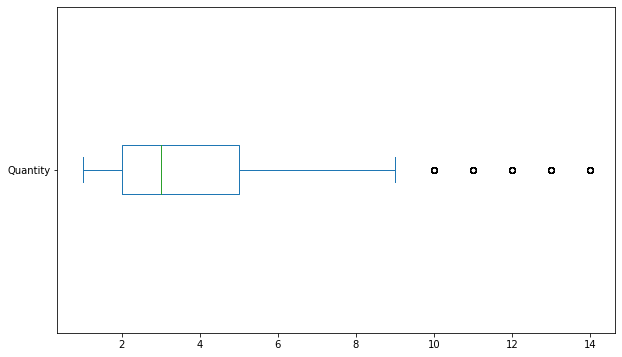

In [8]:
#BOXPLOT
df["Quantity"].plot(kind ='box',vert = False,figsize=(10,6))
plt.show()

In [9]:
## For Quantity column
q1,q3 = np.percentile(df["Quantity"],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
lower_fence, df["Quantity"].min(),df["Quantity"].median(),df["Quantity"].max(),upper_fence
## values that lie outside lower_fence or upper_fence are outliers

(-2.5, 1, 3.0, 14, 9.5)

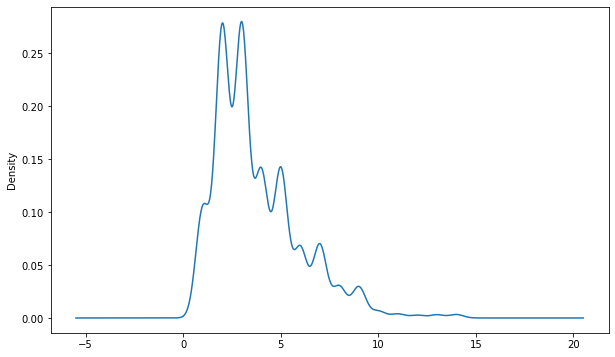

In [10]:
## DENSITY
df["Quantity"].plot(kind='density',figsize=(10,6))
plt.show()

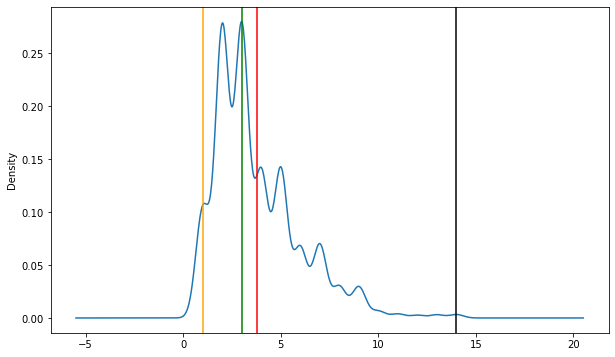

In [11]:
ax = df["Quantity"].plot(kind = 'density',figsize=(10,6))
ax.axvline(df["Quantity"].mean(),color='red')
ax.axvline(df["Quantity"].median(),color='green')
ax.axvline(df["Quantity"].min(),color='orange')
ax.axvline(df["Quantity"].max(),color='black')
plt.show()

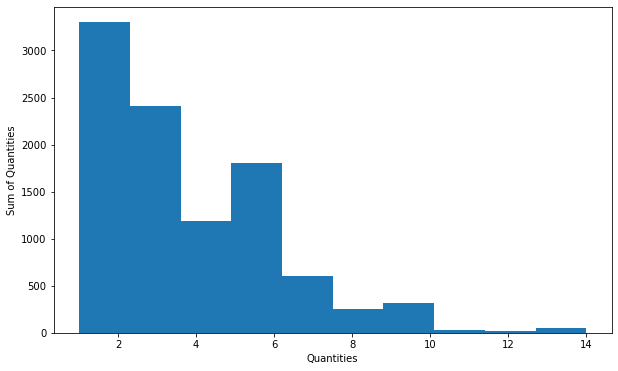

In [12]:
## HISTOGRAM
ax = df["Quantity"].plot(kind='hist',figsize=(10,6))
ax.set_ylabel("Sum of Quantities")
ax.set_xlabel("Quantities")
plt.show()

### Categorical Analysis

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [22]:
## category column
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

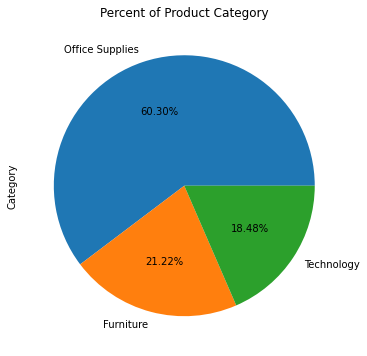

In [18]:
df["Category"].value_counts().plot(kind='pie',figsize=(6,6),autopct ='%.2f%%')
plt.title('Percent of Product Category')
plt.show()

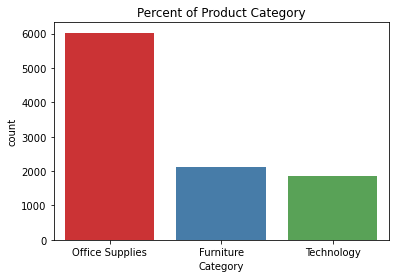

In [25]:
sns.countplot(x='Category',data=df,order=df["Category"].value_counts().index, palette = "Set1")
plt.title('Percent of Product Category')
plt.show()

In [30]:
##Sub-Category
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Name: Sub-Category, dtype: int64

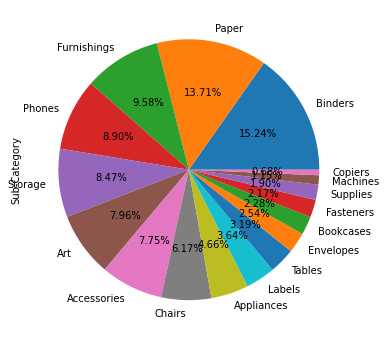

In [32]:
df["Sub-Category"].value_counts().plot(kind='pie',figsize=(6,6),autopct ="%.2f%%")
plt.show()

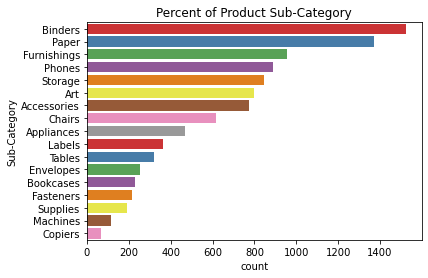

In [33]:
sns.countplot(y='Sub-Category',data=df,order=df["Sub-Category"].value_counts().index, palette = "Set1")
plt.title('Percent of Product Sub-Category')
plt.show()

### More analysis

In [56]:
df.groupby(["Category"])

In [57]:
df.groupby(["Category"]).sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,10693326,118185210.0,741999.7953,8028,368.89,18451.2728
Office Supplies,30010535,330740424.0,719047.0320,22906,947.80,122490.8008
Technology,9241154,102587530.0,836154.0330,6939,244.40,145454.9481


In [58]:
df.groupby(["Category"]).sum()[["Sales"]]

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [59]:
df.groupby(["Category"]).sum()[["Sales"]].sort_values(by = "Sales",ascending=False)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


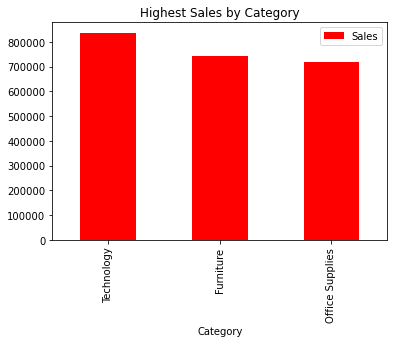

In [60]:
df.groupby(["Category"]).sum()[["Sales"]].sort_values(by = "Sales",ascending=False).nlargest(n=5,columns=['Sales']
                                                                                            ).plot(kind='bar',color='red')
plt.title("Highest Sales by Category")
plt.show()

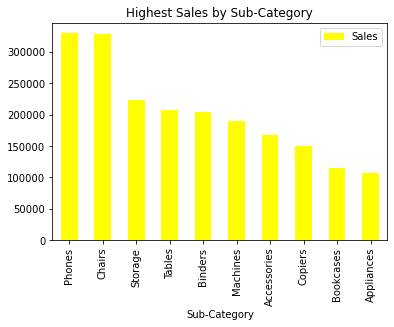

In [63]:
df.groupby(["Sub-Category"]).sum()[["Sales"]].sort_values(by = "Sales",ascending=False).nlargest(n=10,columns=['Sales']
                                                                                            ).plot(kind='bar',color='yellow')
plt.title("Highest Sales by Sub-Category")
plt.show()

### Top 10 customer by Sales

In [66]:
df.groupby(["Customer Name"]).sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Customer Name,,,,,,
Aaron Bergman,40717,516566.0,886.156,13,0.40,129.3465
Aaron Hawkins,74651,565428.0,1744.700,54,1.00,365.2152
Aaron Smayling,35334,558319.0,3050.692,48,3.55,-253.5746
Adam Bellavance,76124,762372.0,7755.620,56,0.80,2054.5885
Adam Hart,136946,818743.0,3250.337,75,2.70,281.1890
...,...,...,...,...,...,...
Xylona Preis,156468,1781278.0,2374.658,100,1.30,621.2300
Yana Sorensen,70256,812394.0,6720.444,58,0.60,1778.2923
Yoseph Carroll,28839,461734.0,5454.350,31,0.60,1305.6290


In [69]:
df.groupby(["Customer Name"]).sum()[["Sales"]]

,Sales
Customer Name,
Aaron Bergman,886.156
Aaron Hawkins,1744.700
Aaron Smayling,3050.692
Adam Bellavance,7755.620
Adam Hart,3250.337
...,...
Xylona Preis,2374.658
Yana Sorensen,6720.444
Yoseph Carroll,5454.350


In [70]:
df.groupby(["Customer Name"]).sum()[["Sales"]].sort_values(by="Sales",ascending=False)

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Roy Skaria,22.328
Mitch Gastineau,16.739
Carl Jackson,16.520


In [72]:
df.groupby(["Customer Name"]).sum()[["Sales"]].sort_values(by="Sales",ascending=False).nlargest(n=10,columns=["Sales"])

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


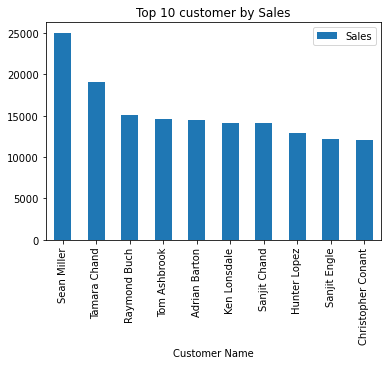

In [76]:
df.groupby(["Customer Name"]).sum()[["Sales"]].sort_values(by="Sales",ascending=False).nlargest(n=10,columns=["Sales"]
                                                                                               ).plot(kind='bar')
plt.title("Top 10 customer by Sales")
plt.show()

### Relationship between columns

In [78]:
new_df = df.drop(["Row ID","Postal Code"],axis = 1)
new_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [79]:
corr = new_df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


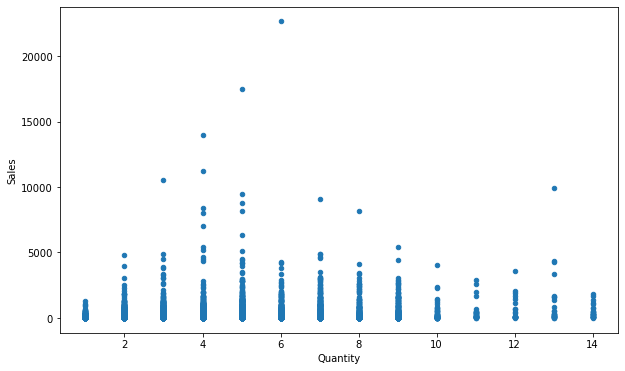

In [82]:
new_df.plot(kind='scatter',x='Quantity',y='Sales',figsize=(10,6))
plt.show()

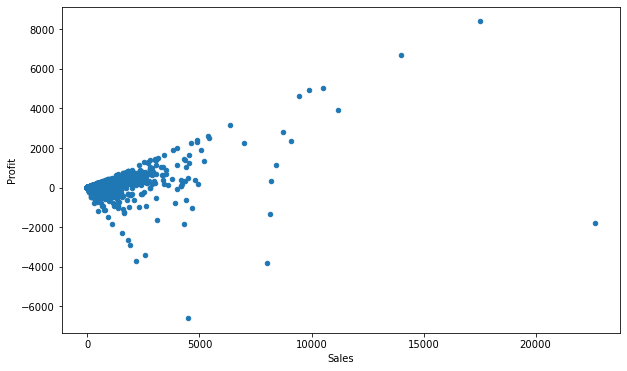

In [84]:
new_df.plot(kind='scatter',y='Profit',x='Sales',figsize=(10,6))
plt.show()

### column wrangling

In [85]:
new_df["Revenue"]=new_df["Sales"]-new_df["Discount"]
new_df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,261.96
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,731.94
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,14.62


In [87]:
new_df["Year"]=new_df["Order Date"].apply(lambda x:x.year)
new_df["Month"]=new_df["Order Date"].apply(lambda x:x.month)
new_df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,Year,Month
0,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,261.96,2020,11
1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,731.94,2020,11
2,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,14.62,2020,6


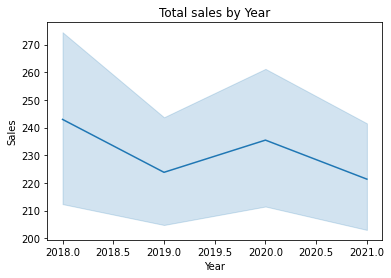

In [88]:
sns.lineplot(x=new_df["Year"],y=new_df["Sales"])
plt.title("Total sales by Year")
plt.show()

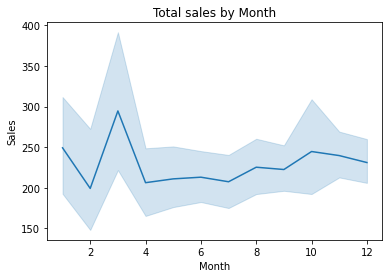

In [90]:
sns.lineplot(x=new_df["Month"],y=new_df["Sales"])
plt.title("Total sales by Month")
plt.show()

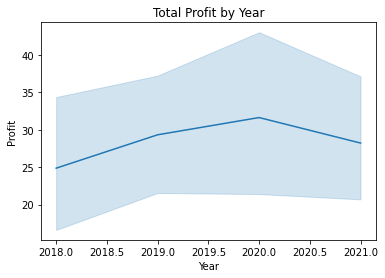

In [91]:
sns.lineplot(x=new_df["Year"],y=new_df["Profit"])
plt.title("Total Profit by Year")
plt.show()

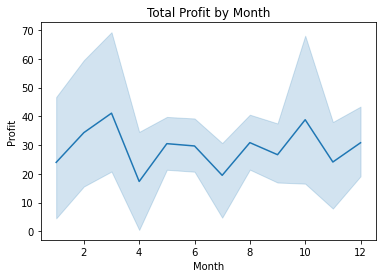

In [92]:
sns.lineplot(x=new_df["Month"],y=new_df["Profit"])
plt.title("Total Profit by Month")
plt.show()